In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suprimindo FutureWarnings
warnings.simplefilter(action='ignore', category = FutureWarning)

In [67]:
# Importando os datasets à serem utilizados
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [68]:
df_train.head(5)

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [69]:
df_train.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [70]:
tupla_shape = df_train.shape
print(f"Dataset possui {tupla_shape[0]} linhas e {tupla_shape[1]} colunas.")

Dataset possui 36992 linhas e 25 colunas.


In [71]:
df_train.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


# Análise Exploratória de Dados (EDA)

O objetivo é entender a estrutura, as características e as relações entre as variáveis do conjunto de dados.

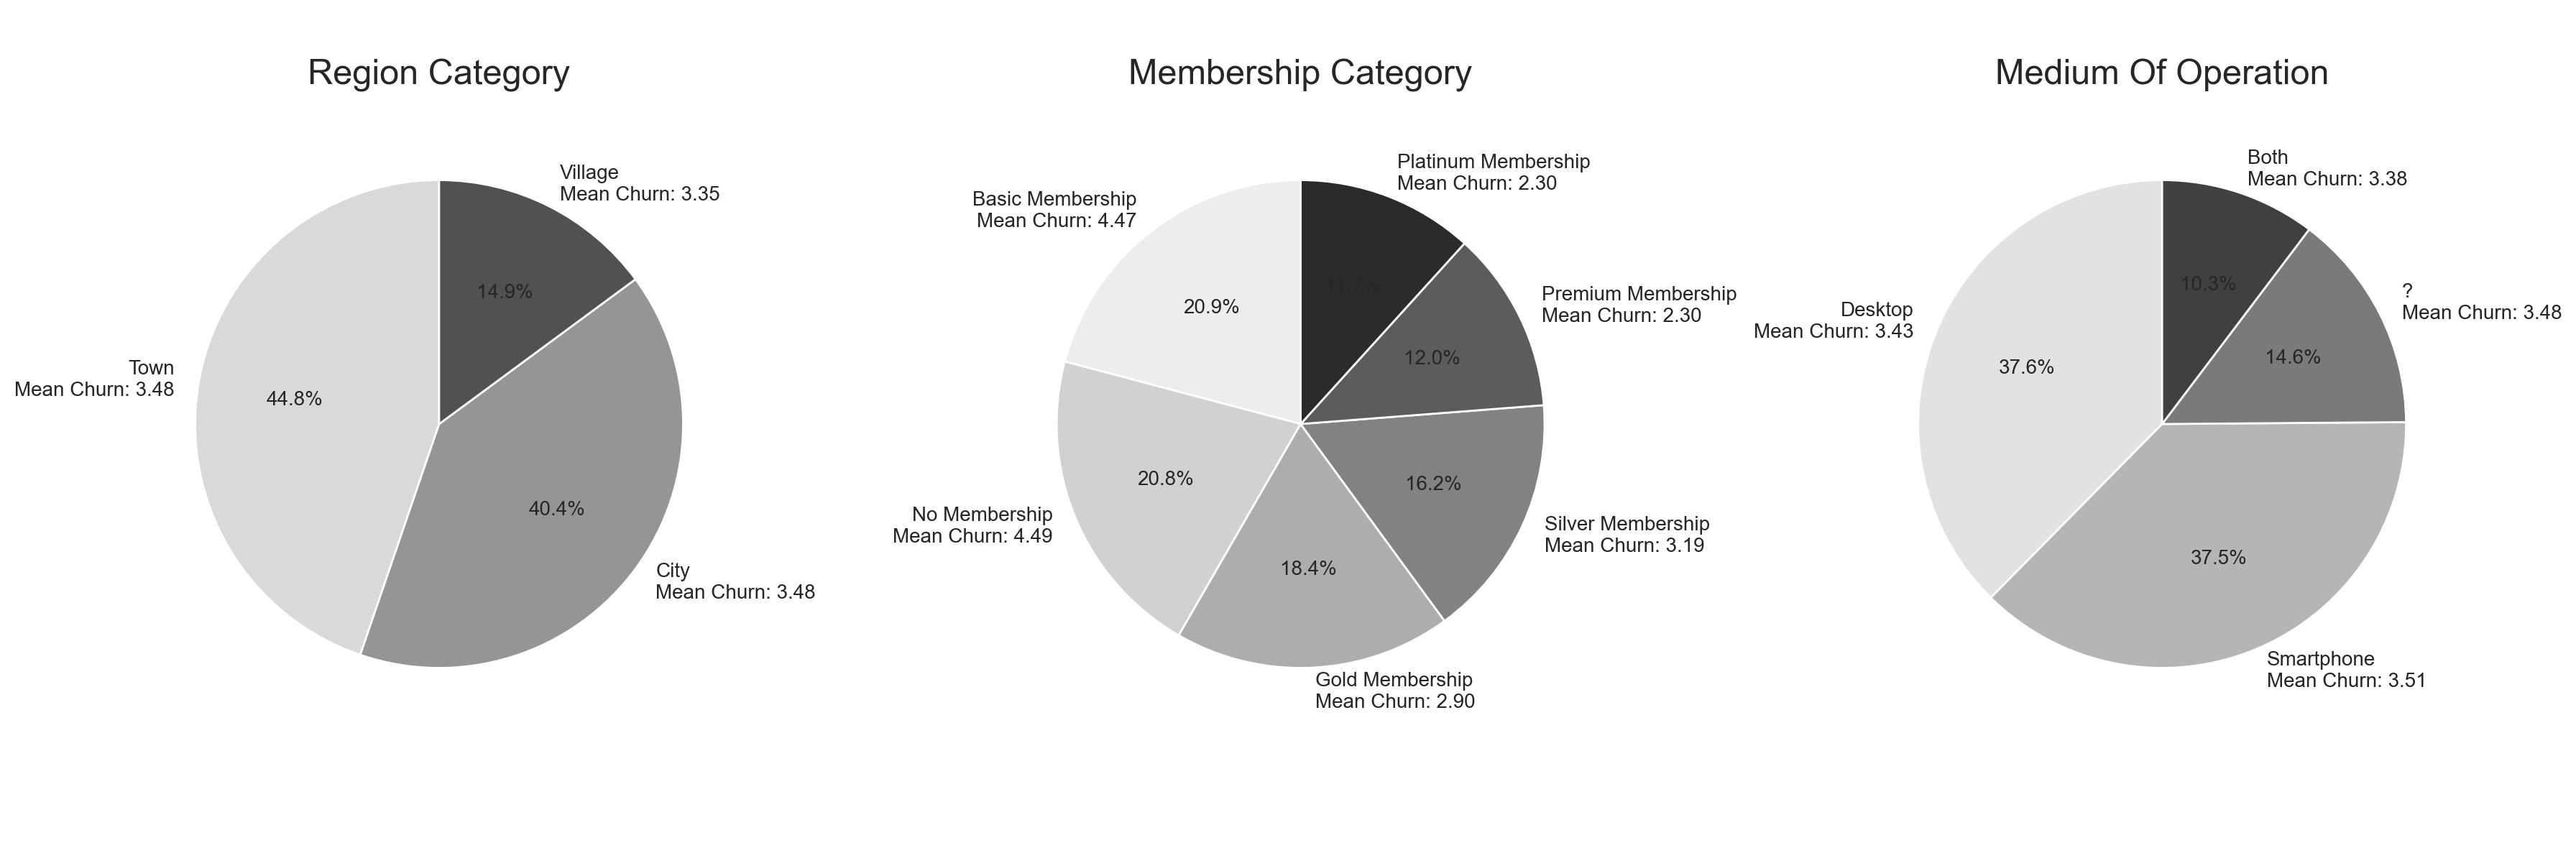

In [72]:
# Colunas para verificar a contagem e adicionar o cálculo de risco de churn
colunas_contagem = ["region_category", "membership_category", "medium_of_operation"]

fig, axs = plt.subplots(1, 3, figsize=(18, 6), dpi=200)

# Iterando pelas colunas para gerar os Pie-Plots
for idx, col in enumerate(colunas_contagem):
    counts = df_train[col].value_counts()
    
    churn_means = df_train.groupby(col)['churn_risk_score'].mean()
    labels = [f'{label}\nMean Churn: {churn_means[label]:.2f}' for label in counts.index]
    
    axs[idx].pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Greys", n_colors=len(counts)))
    
    axs[idx].set_title(f'{col.replace("_", " ").title()}', y=0.9, fontsize=17.5)
    axs[idx].axis('equal')

plt.tight_layout()
plt.show()

# Data Cleaning

Esse processo é essencial para garantir a qualidade e consistência dos dados antes de aplicá-los em análises ou nos modelos de machine learning.

In [73]:
# Selecionando colunas inúteis para o projeto
colunas_inuteis = ["customer_id", "Name", "security_no", "referral_id"]

# Eliminando essas colunas
for df in [df_train, df_test]:
    df.drop(colunas_inuteis, axis = 1, inplace = True)